In [1]:
# Imports and Setups
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set paths
RAW_PATH = '../../data/raw/fer2013'
PROCESSED_PATH = '../../data/processed/FC211012_Azeem'

# Make plots nicer
sns.set(style="whitegrid")

C:\Users\moham\AppData\Local\Temp\ipykernel_22116\2294047101.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\moham\AppData\Local\Temp\ipykernel_22116\2294047101.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


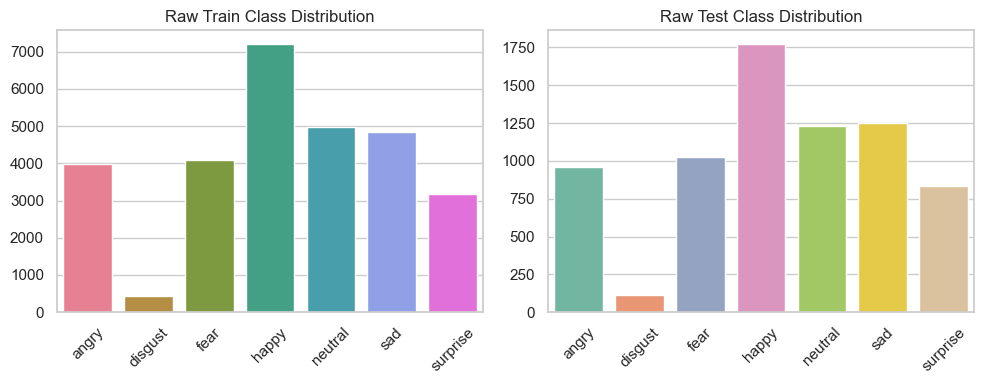

In [ ]:
# Count Images Per Class (Raw)
def count_images_in_folder(folder):
    class_counts = {}
    for emotion in os.listdir(folder):
        emotion_path = os.path.join(folder, emotion)
        if os.path.isdir(emotion_path):
            class_counts[emotion] = len(os.listdir(emotion_path))
    return class_counts


raw_train_counts = count_images_in_folder(os.path.join(RAW_PATH, 'train'))
raw_test_counts = count_images_in_folder(os.path.join(RAW_PATH, 'test'))

# Bar plot for raw data
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.barplot(
    x=list(raw_train_counts.keys()), 
    y=list(raw_train_counts.values()), 
    palette="husl"   # Add colorful palette
)
plt.title("Raw Train Class Distribution")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(
    x=list(raw_test_counts.keys()), 
    y=list(raw_test_counts.values()), 
    palette="Set2"   # Add colorful palette
)
plt.title("Raw Test Class Distribution")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


C:\Users\moham\AppData\Local\Temp\ipykernel_22116\31006408.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(processed_train_counts.keys()),
C:\Users\moham\AppData\Local\Temp\ipykernel_22116\31006408.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(processed_test_counts.keys()),


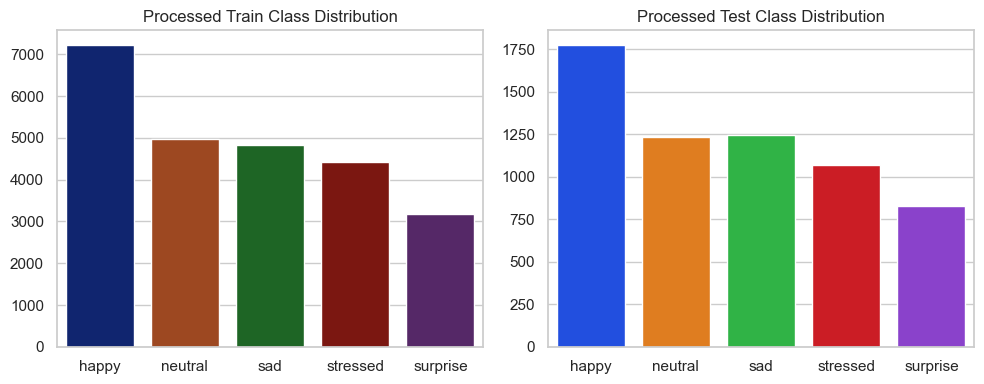

In [12]:
# Count Images Per Class (Processed)

processed_train_counts = count_images_in_folder(
    os.path.join(PROCESSED_PATH, 'train'))
processed_test_counts = count_images_in_folder(
    os.path.join(PROCESSED_PATH, 'test'))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(x=list(processed_train_counts.keys()),
            y=list(processed_train_counts.values()),palette="dark")
plt.title("Processed Train Class Distribution")

plt.subplot(1, 2, 2)
sns.barplot(x=list(processed_test_counts.keys()),
            y=list(processed_test_counts.values()),palette="bright")
plt.title("Processed Test Class Distribution")
plt.tight_layout()
plt.show()

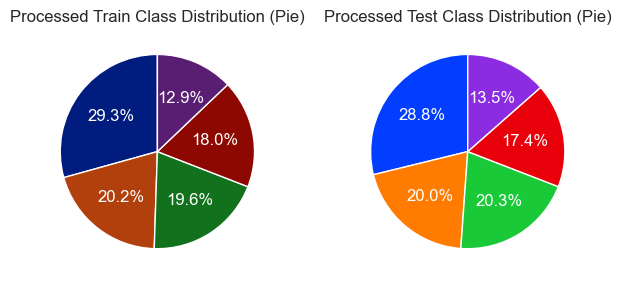

In [15]:
# For better visualization, use pie charts to show class proportions in the processed train and test datasets
# Pie charts
plt.subplot(1, 2, 1)
plt.pie(
    processed_train_counts.values(),
    labels=processed_train_counts.keys(),
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("dark"),
    textprops={'color': 'white'}
)
plt.title("Processed Train Class Distribution (Pie)")

plt.subplot(1, 2, 2)
plt.pie(
    processed_test_counts.values(),
    labels=processed_test_counts.keys(),
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("bright"),
    textprops={'color': 'white'}
)
plt.title("Processed Test Class Distribution (Pie)")

plt.tight_layout()
plt.show()

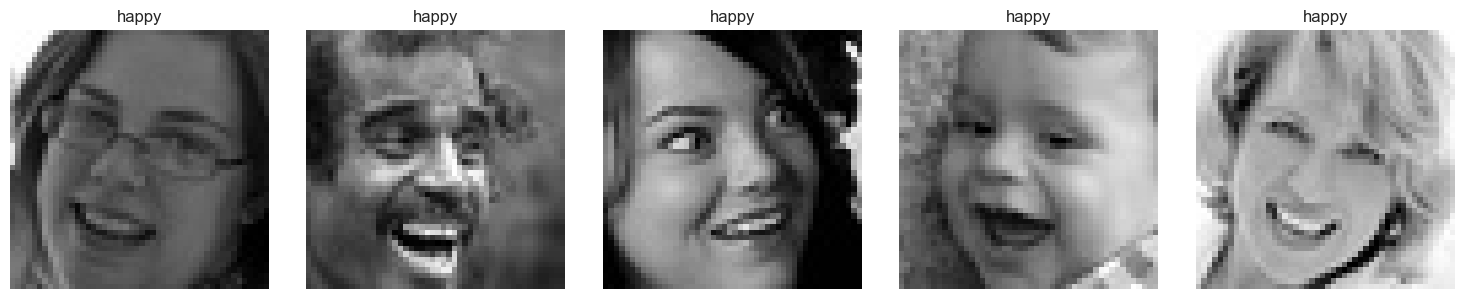

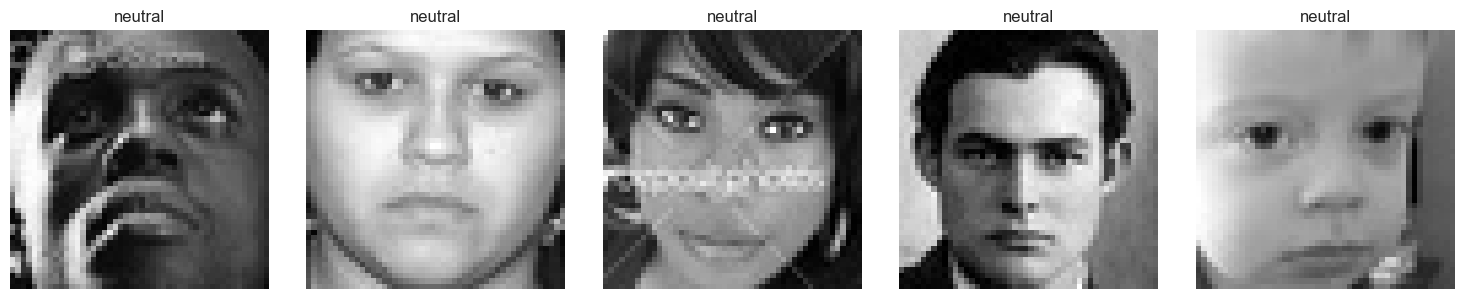

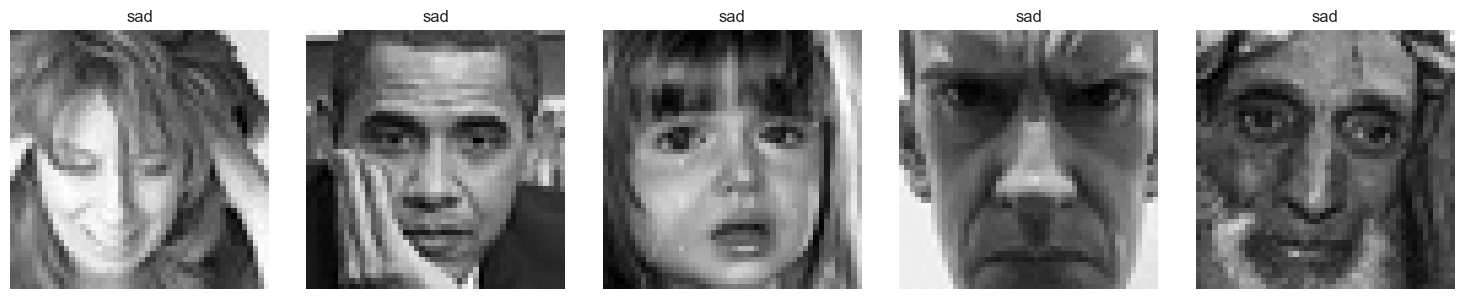

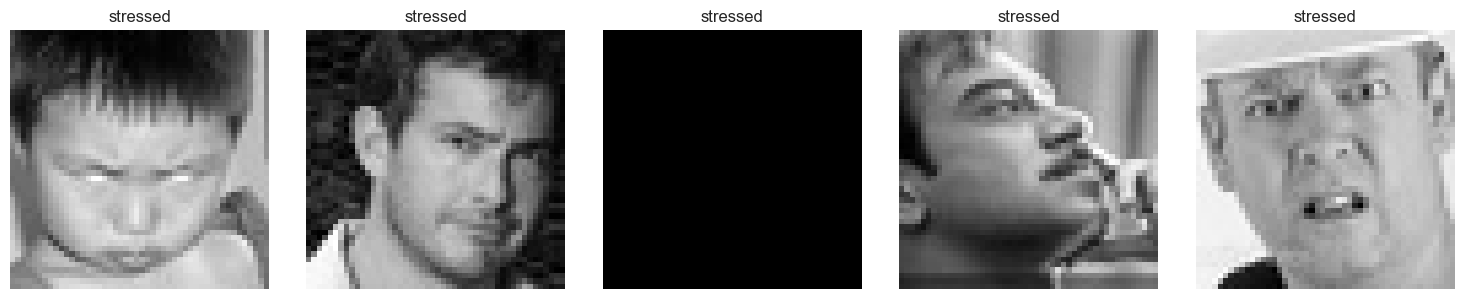

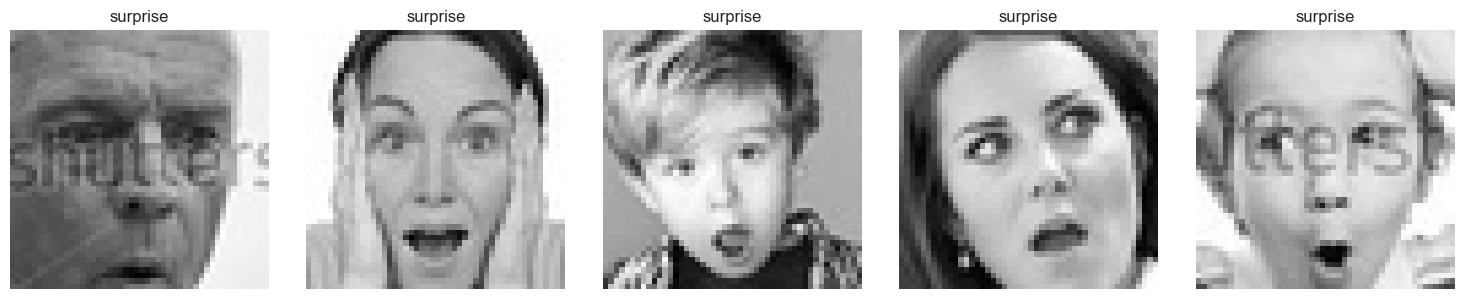

In [4]:
# Sample Images Viewer

def show_sample_images(base_path, class_name, num=5):
    class_path = os.path.join(base_path, class_name)
    images = os.listdir(class_path)[:num]

    plt.figure(figsize=(15, 3))
    for idx, img_name in enumerate(images):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        plt.subplot(1, num, idx+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(f"{class_name}")
    plt.tight_layout()
    plt.show()


# Show samples from each class
for cls in processed_train_counts.keys():
    show_sample_images(os.path.join(PROCESSED_PATH, 'train'), cls)

Image shape: (48, 48)


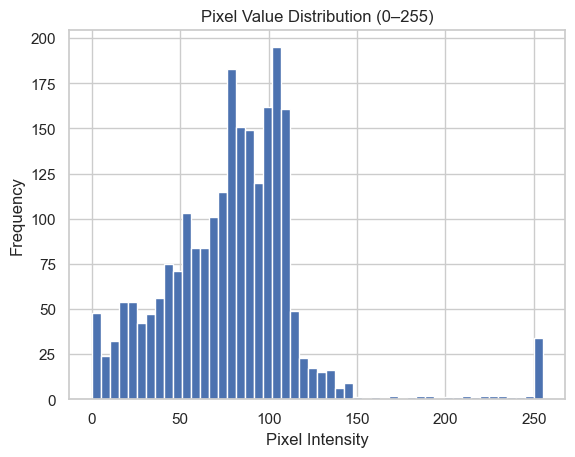

In [ ]:
# Image Shape & Pixel Distribution
sample_img_path = os.path.join(PROCESSED_PATH, 'train', 'happy')
img_file = os.listdir(sample_img_path)[0]
img = cv2.imread(os.path.join(sample_img_path, img_file), cv2.IMREAD_GRAYSCALE)

print("Image shape:", img.shape)

plt.hist(img.ravel(), bins=50)
plt.title("Pixel Value Distribution (0–255)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

In [6]:
# Summary

from IPython.display import Markdown as md

md("""
### Summary:

- Dataset has been successfully merged and structured into 5 classes: `happy`, `neutral`, `sad`, `surprise`, `stressed`.
- Image size is consistent: **48x48**, grayscale.
- Class distributions are visualized before and after processing.
- Sample images from each class are displayed.
- Pixel value histogram shows normalization is needed (already done in preprocessing).

""")


### Summary:

- Dataset has been successfully merged and structured into 5 classes: `happy`, `neutral`, `sad`, `surprise`, `stressed`.
- Image size is consistent: **48x48**, grayscale.
- Class distributions are visualized before and after processing.
- Sample images from each class are displayed.
- Pixel value histogram shows normalization is needed (already done in preprocessing).

